In [95]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import strftime, time
from datetime import datetime as dt
%matplotlib inline

In [96]:
imagem = Image.open('lucca400.jpg')

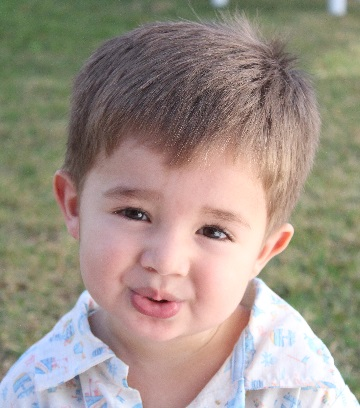

In [97]:
imagem

In [98]:
def cluster_foto(imagem, num_clusters, algoritmo="KMeans"):

    inicio = dt.now()

    #transformando a imagem e uma matriz
    matriz = np.asarray(imagem)

    #armazenando a dimensão da imagem em uma variável
    medidas = matriz.shape[0:2]

    #alterando o shape da matriz para apenas 1 elemento (RGB) por linha
    matriz_linha = np.reshape(matriz, (medidas[0]*medidas[1], 3))

    if algoritmo == "KMeans":
        from sklearn.cluster import KMeans

        kmeans = KMeans(n_clusters=num_clusters)
        modelo = kmeans.fit(matriz_linha)
        labels = modelo.labels_

    elif algoritmo == "GMM":
        from sklearn.mixture import GaussianMixture

        gm = GaussianMixture(n_components=num_clusters)
        labels = gm.fit_predict(matriz_linha)

    #declaração de cores baseada no centroide
    cor = {}
    for c in modelo.labels_:
        cor[c] = np.array(modelo.cluster_centers_[c])


    #criando uma matriz nova que recebera as cores de acordo com os labels encontrados pelo algoritmo

    matriz_com_cores = np.zeros(shape=((medidas[0]*medidas[1],3)))

    for i, p in zip(labels, range(len(labels))):
        matriz_com_cores[p] = cor[i]

    #reconstroi a matriz no formato orginal e em seguida transforma em imagem
    matriz_reconstruida = np.reshape(matriz_com_cores, (medidas[0],medidas[1],3), order="C").astype('uint8')
    imagem_nova = Image.fromarray(matriz_reconstruida, mode="RGB")

    fim = dt.now()
    
    #print(f'Tempo total: {fim-inicio}')
    
    return matriz_reconstruida

<Figure size 432x288 with 0 Axes>

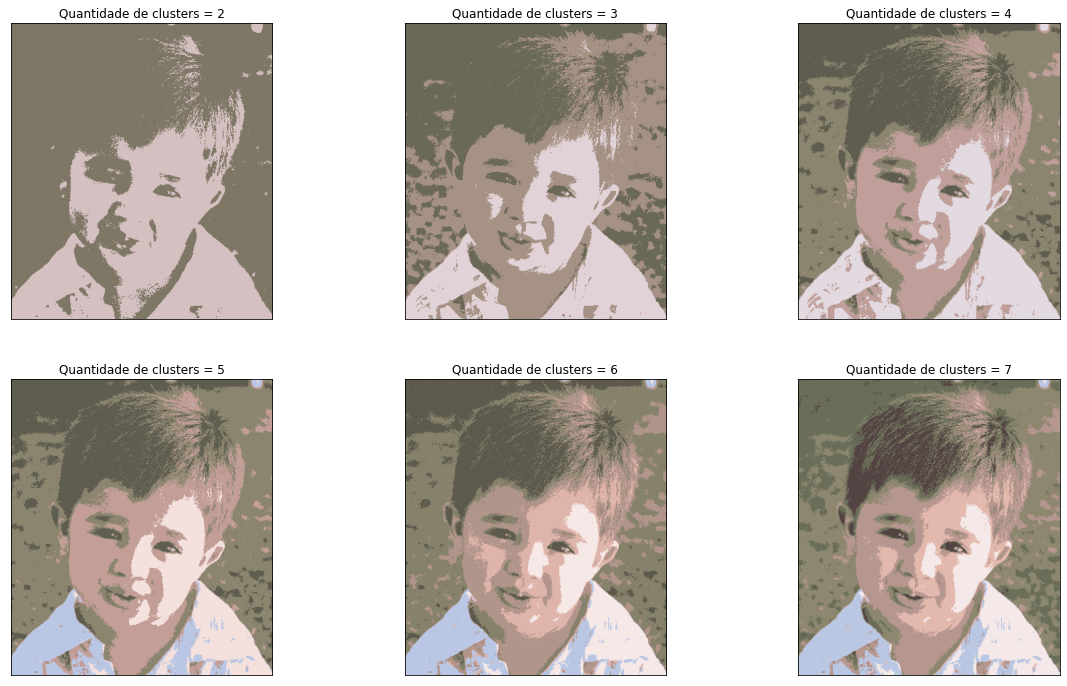

In [99]:
figura = plt.gcf()
plt.figure(figsize=(20,12))
for k in range(2,8):
    figura = plt.subplot(2, 3, k-1)
    plt.imshow(cluster_foto(imagem, num_clusters=k))
    plt.title(f'Quantidade de clusters = {k}')
    plt.yticks([])
    plt.xticks([])